# Visualization of the MRI data

## NIfTI-1 Data Format

- Adapted from the widely used ANALYZE™ 7.5 file format. The most commonly-used format for multi-dimensional neuroimaging data (2012)
- Most packages also support reading gzip-compressed NIfTI files, which should have the extension .NII.gz.
- Generally containing at least 3-dimensional data: voxels, or pixels with a width, height, and depth. Can up to 7-dimensional.

References:
- Documentation: https://nifti.nimh.nih.gov/nifti-1/
- Python package: https://nipy.org/nibabel/ (use pip instead of conda)

<!-- 单位是什么？？ -->

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
import nibabel as nib

In [6]:
# prepare data path
BASE_IMG_PATH = os.path.join(os.getcwd(), 'data')
all_images = glob(os.path.join(BASE_IMG_PATH,'T1_brain*'))

# read test image and corresponding mask
header = nib.load(all_images[0]).header
test_image = nib.load(all_images[0]).get_fdata()
test_mask = nib.load(all_images[1]).get_fdata()

# print header and test_image size
print(header)
print('\n\ntest_image size: ',test_image.shape)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 169 212 177   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.        0.9999955 1.        1.        2.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b'imgComments'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.09927082
quatern_c       : -0.003266067
quatern_d       : 0.044132743
qoffset_x       : -79.239044

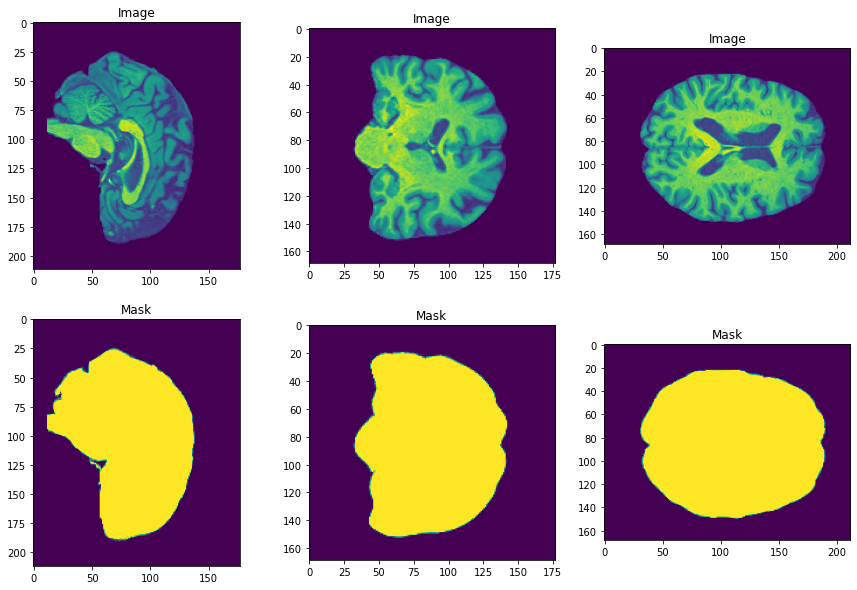

In [7]:
# print central section of the cubic data
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize = (15, 10))
cmap_name = 'viridis'
ax1.imshow(test_image[test_image.shape[0]//2,:,:], cmap=cmap_name)
ax1.set_title('Image')
ax2.imshow(test_image[:,test_image.shape[1]//2,:], cmap=cmap_name)
ax2.set_title('Image')
ax3.imshow(test_image[:,:,test_image.shape[2]//2], cmap=cmap_name)
ax3.set_title('Image')
ax4.imshow(test_mask[test_image.shape[0]//2,:,:], cmap=cmap_name)
ax4.set_title('Mask')
ax5.imshow(test_mask[:,test_image.shape[1]//2,:], cmap=cmap_name)
ax5.set_title('Mask')
ax6.imshow(test_mask[:,:,test_image.shape[2]//2], cmap=cmap_name)
ax6.set_title('Mask');

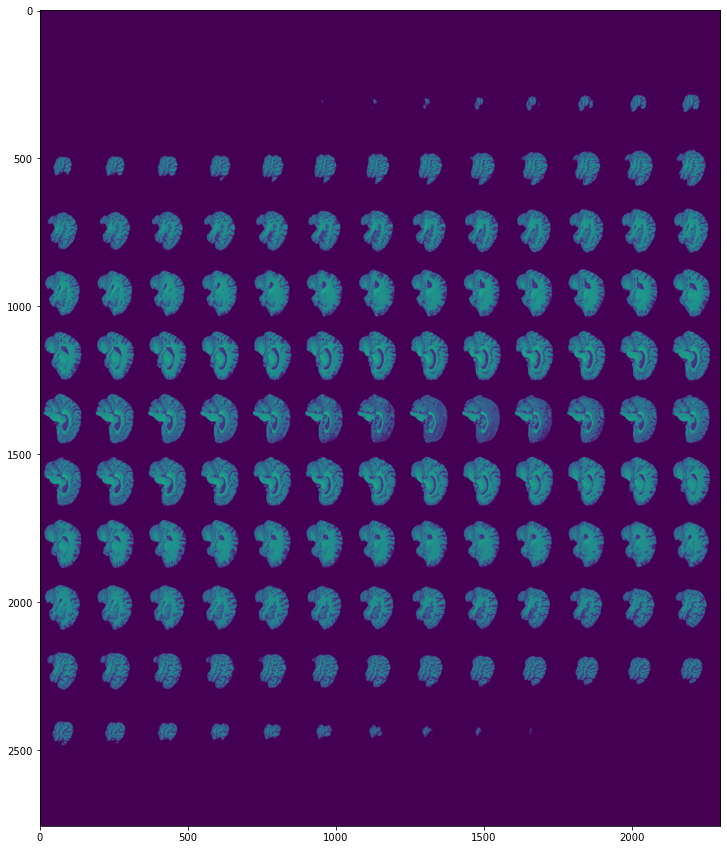

In [8]:
# visulization through montage function
from skimage.util import montage
fig, ax1 = plt.subplots(1, 1, figsize = (15, 15))
ax1.imshow(montage(test_image), cmap ='viridis')

## DICOM

Demo data: UK biobank scout images for brain scans - DICOM (https://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=20215)

References:
- Website: https://www.dicomstandard.org/about
- Python package: https://pydicom.github.io/pydicom/stable/index.html

In [9]:
from pydicom.data import get_testdata_file
from pydicom import dcmread

In [10]:
import pandas as pd 
BASE_IMG_PATH = '/Users/lida/UKB_demo_data/eg_brain_scout'
fpath = BASE_IMG_PATH + '/manifest.cvs'
data = pd.read_csv(fpath)
data.head()

,filename,patientid,studyid,study discription,date,seriesid,series discription,aet,host
0,1.3.12.2.1107.5.2.19.45594.2018071915164348309...,J3DEP5C5,1.2.826.0.1.4978912.2142.20180719150610,UKBiobank_Head^head_v6.0,2018-07-19,1.3.12.2.1107.5.2.19.45594.2018071915164344102...,AAHead_Scout_32ch-head-coil_MPR_cor,Skyra,AWP45594
1,1.3.12.2.1107.5.2.19.45594.2018071915164348332...,J3DEP5C5,1.2.826.0.1.4978912.2142.20180719150610,UKBiobank_Head^head_v6.0,2018-07-19,1.3.12.2.1107.5.2.19.45594.2018071915164344102...,AAHead_Scout_32ch-head-coil_MPR_cor,Skyra,AWP45594
2,1.3.12.2.1107.5.2.19.45594.2018071915164348359...,J3DEP5C5,1.2.826.0.1.4978912.2142.20180719150610,UKBiobank_Head^head_v6.0,2018-07-19,1.3.12.2.1107.5.2.19.45594.2018071915164344102...,AAHead_Scout_32ch-head-coil_MPR_cor,Skyra,AWP45594
3,1.3.12.2.1107.5.2.19.45594.2018071915164348384...,J3DEP5C5,1.2.826.0.1.4978912.2142.20180719150610,UKBiobank_Head^head_v6.0,2018-07-19,1.3.12.2.1107.5.2.19.45594.2018071915164344132...,AAHead_Scout_32ch-head-coil_MPR_tra,Skyra,AWP45594
4,1.3.12.2.1107.5.2.19.45594.2018071915164348437...,J3DEP5C5,1.2.826.0.1.4978912.2142.20180719150610,UKBiobank_Head^head_v6.0,2018-07-19,1.3.12.2.1107.5.2.19.45594.2018071915164344132...,AAHead_Scout_32ch-head-coil_MPR_tra,Skyra,AWP45594


In [11]:
# set path
fpath1 = BASE_IMG_PATH + '/' + data['filename'][0]
fpath2 = BASE_IMG_PATH + '/' +  data['filename'][1]
fpath3 = BASE_IMG_PATH + '/' +  data['filename'][2]
fpath4 = BASE_IMG_PATH + '/' +  data['filename'][3]
fpath5 = BASE_IMG_PATH + '/' +  data['filename'][4]
fpath6 = BASE_IMG_PATH + '/' +  data['filename'][5]

# read data
ds1 = dcmread(fpath1)
ds2 = dcmread(fpath2)
ds3 = dcmread(fpath3)
ds4 = dcmread(fpath4)
ds5 = dcmread(fpath5)
ds6 = dcmread(fpath6)

# show the header of DICOM file
print(ds1)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 212
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.2.19.45594.2018071915164348309002008
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMBP_360'
(0002, 0016) Source Application Entity Title     AE: 'MRC45594'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'MPR', 'NORM', 'DIS2D']
(0008, 0012) Instance Creation Date              DA: '20180719'
(0008, 0013) Instance Creation Time              TM: '151644.104000'
(0008, 

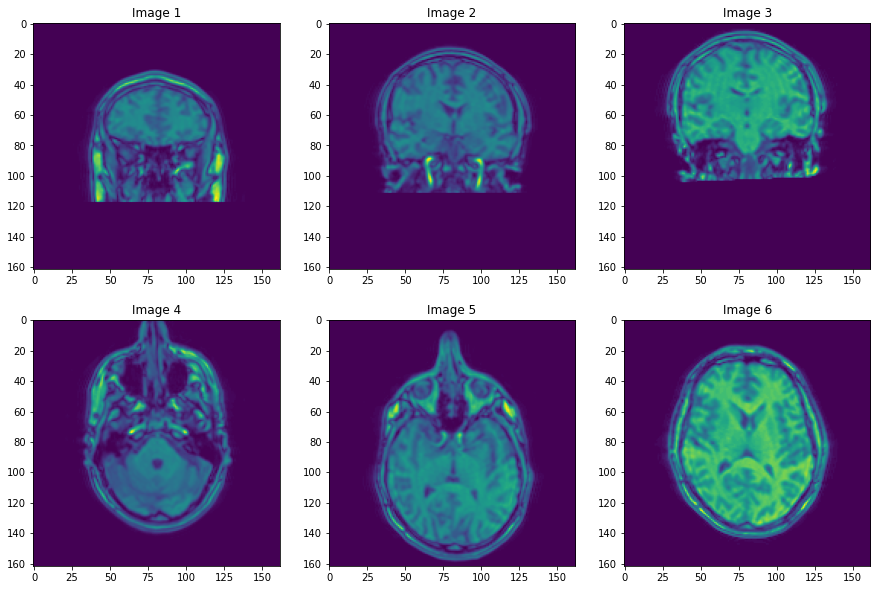

In [12]:
# print
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize = (15, 10))
cmap_name = 'viridis'
ax1.imshow(ds1.pixel_array, cmap=cmap_name)
ax1.set_title('Image 1')
ax2.imshow(ds2.pixel_array, cmap=cmap_name)
ax2.set_title('Image 2')
ax3.imshow(ds3.pixel_array, cmap=cmap_name)
ax3.set_title('Image 3')
ax4.imshow(ds4.pixel_array, cmap=cmap_name)
ax4.set_title('Image 4')
ax5.imshow(ds5.pixel_array, cmap=cmap_name)
ax5.set_title('Image 5')
ax6.imshow(ds6.pixel_array, cmap=cmap_name)
ax6.set_title('Image 6');